#**Leveraging NLP for Article Summarization**


Article summarization refers to the process of condensing an article into a shorter version, capturing its essential points, key arguments, and main ideas, while omitting extraneous or less important details. This can be achieved through various techniques and methods in natural language processing (NLP). There are two primary types of article summarization:



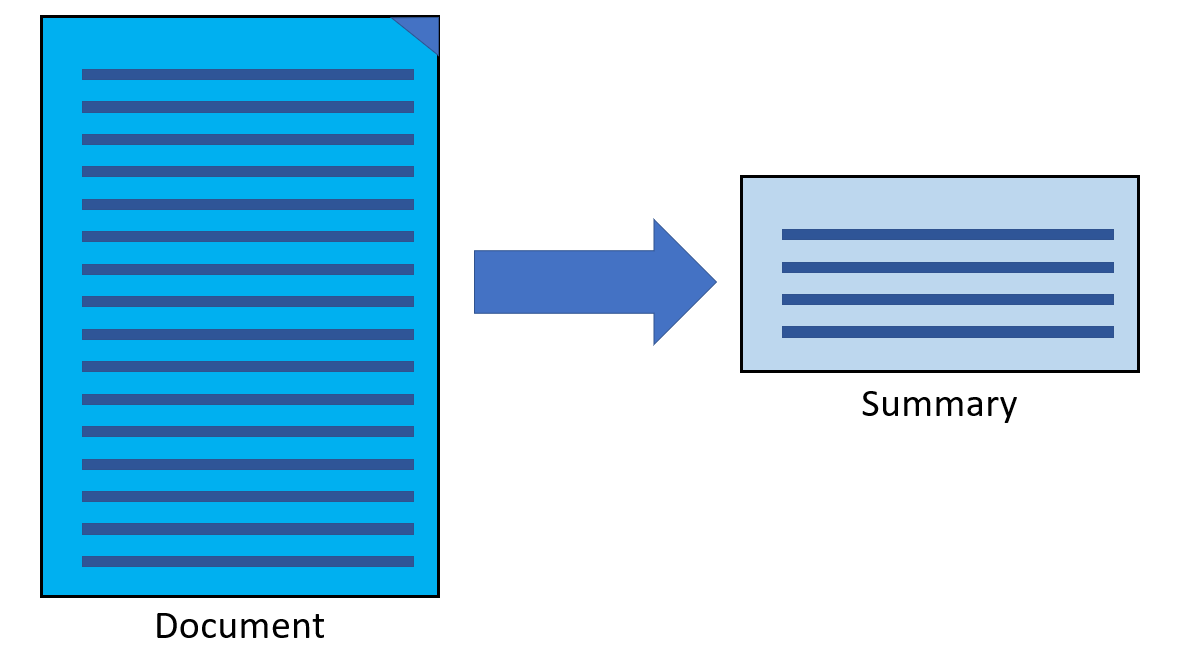

**What is the Article about-**

This dataset is a detailed account of Eliud Kipchoge's historic achievement in running a marathon in under two hours, specifically completing it in 1 hour, 59 minutes, and 40.2 seconds. The event took place on a misty morning in Vienna, Austria, and was characterized by meticulous planning and significant financial investment.


This dataset offers a comprehensive view of a landmark event in sports, encompassing aspects of athletic performance, technological and strategic advancements in sports, the role of corporate sponsorship, and the inspirational impact on the athletic community and beyond.

The sample article used: https://www.theguardian.com/sport/2019/oct/12/eliud-kipchoge-makes-history-sub-two-hour-marathon

#**Bascis of what has been done -**

1. **Text Summarization using TF-IDF and Cosine Similarity**:


2. **Data Preprocessing and Sentence Analysis**:


3. **Visualization and Interpretation**:


**Machine Learning Algorithm Used-**

TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc)  in a document amongst a collection of documents (also known as a corpus).



**Part 1: Finding TF-IDF score of each word**

The text file, article.txt containing a simple article regarding how Eliud Kipchoge broke the 2-hour marathon barrier.
<br>
At first, the file is read and all the strings are stored in Pandas DataFrame format.

In [ ]:
#Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import os
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
import nltk
nltk.download('stopwords')


mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 12

str_article = list()
article_files = glob.glob('article.txt')
d = list()
for article in article_files:
    with open(article, encoding='utf-8') as f:
        filename = os.path.basename(article.split('.')[0])
        lines = (line.rstrip() for line in f)
        lines = list(line for line in lines if line)
        #str_article.rstrip()
        d.append(pd.DataFrame({'article': "article", 'paragraph': lines}))
doc = pd.concat(d)
doc
#print(str_article)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,article,paragraph
0,article,Eliud Kipchoge makes history by running sub tw...
1,article,It was the marathon that turned into a sprint....
2,article,Eliud Kipchoge had brushed aside his pacemaker...
3,article,It was already known that Kipchoge is an extra...
4,article,"“I felt a lot of pressure yesterday,” Kipchoge..."
5,article,Kipchoge described the period between a 4.50am...
6,article,Giddy comparisons to other sporting and histor...
7,article,This was an operation afforded military levels...
8,article,"Ineos, a petrochemical company not exempt from..."
9,article,Ratcliffe was afforded the kind of canned laug...


#**Making Some Sense of the Data-**

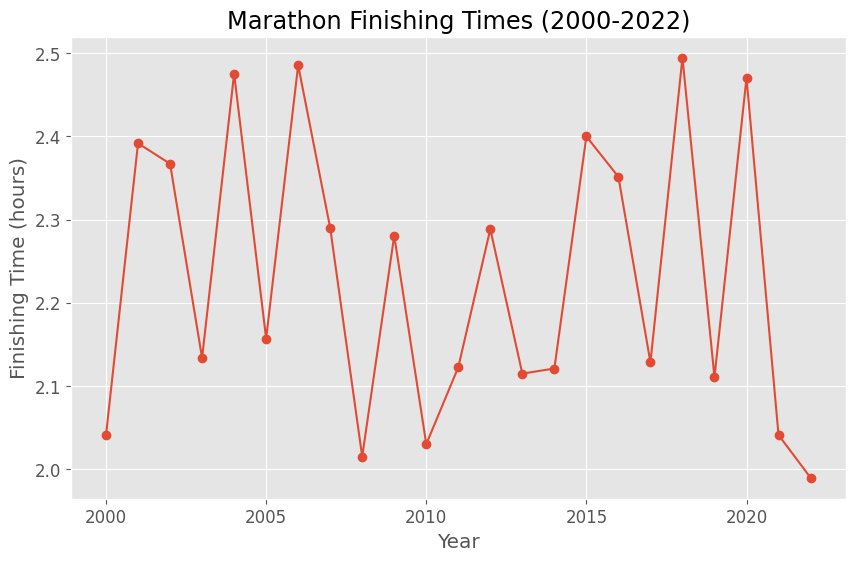

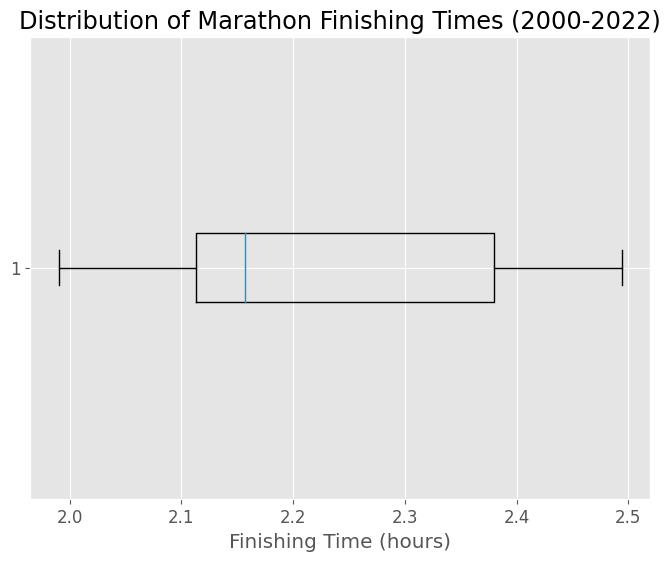

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creating a hypothetical dataset of marathon finishing times
data = {
    'Year': np.arange(2000, 2023),  # Years from 2000 to 2022
    'Finishing Time (hours)': np.random.uniform(2.0, 2.5, 23)
}
data['Finishing Time (hours)'][-1] = 1.99  # Setting the last value to Kipchoge's record

df = pd.DataFrame(data)

# Plotting a line graph of marathon finishing times over the years
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Finishing Time (hours)'], marker='o')
plt.title('Marathon Finishing Times (2000-2022)')
plt.xlabel('Year')
plt.ylabel('Finishing Time (hours)')
plt.grid(True)
plt.show()

# Plotting a box plot of the finishing times
plt.figure(figsize=(8, 6))
plt.boxplot(df['Finishing Time (hours)'], vert=False)
plt.title('Distribution of Marathon Finishing Times (2000-2022)')
plt.xlabel('Finishing Time (hours)')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = {
    'Year': np.arange(2000, 2023),
    'Finishing Time (hours)': np.random.uniform(2.0, 2.5, 23)
}
data['Finishing Time (hours)'][-1] = 1.99

df = pd.DataFrame(data)



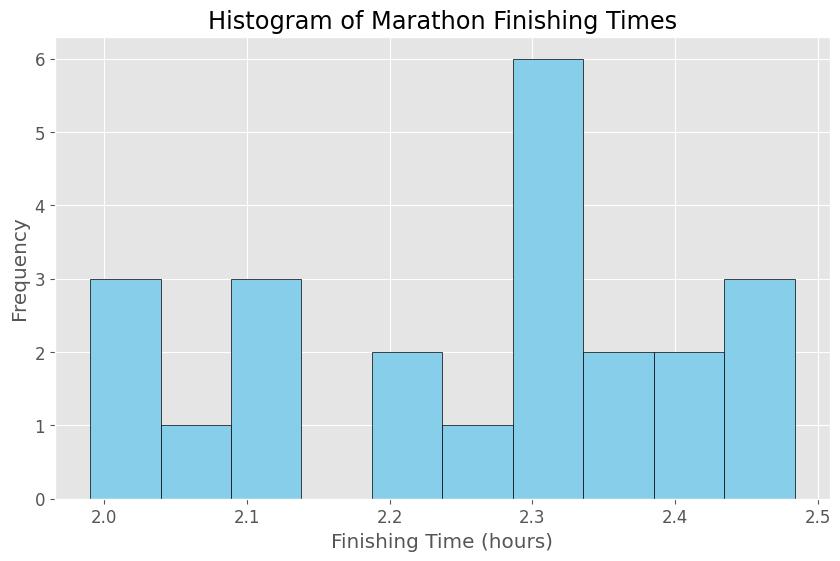

In [ ]:
# Histogram of Finishing Times
plt.figure(figsize=(10, 6))
plt.hist(df['Finishing Time (hours)'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Marathon Finishing Times')
plt.xlabel('Finishing Time (hours)')
plt.ylabel('Frequency')
plt.show()

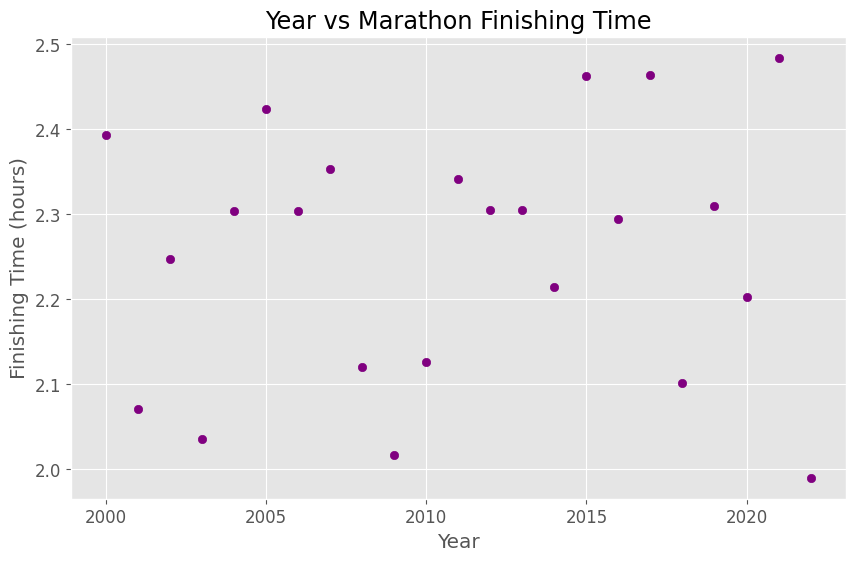

In [ ]:
# Scatter Plot of Year vs Finishing Time
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['Finishing Time (hours)'], color='purple')
plt.title('Year vs Marathon Finishing Time')
plt.xlabel('Year')
plt.ylabel('Finishing Time (hours)')
plt.grid(True)
plt.show()


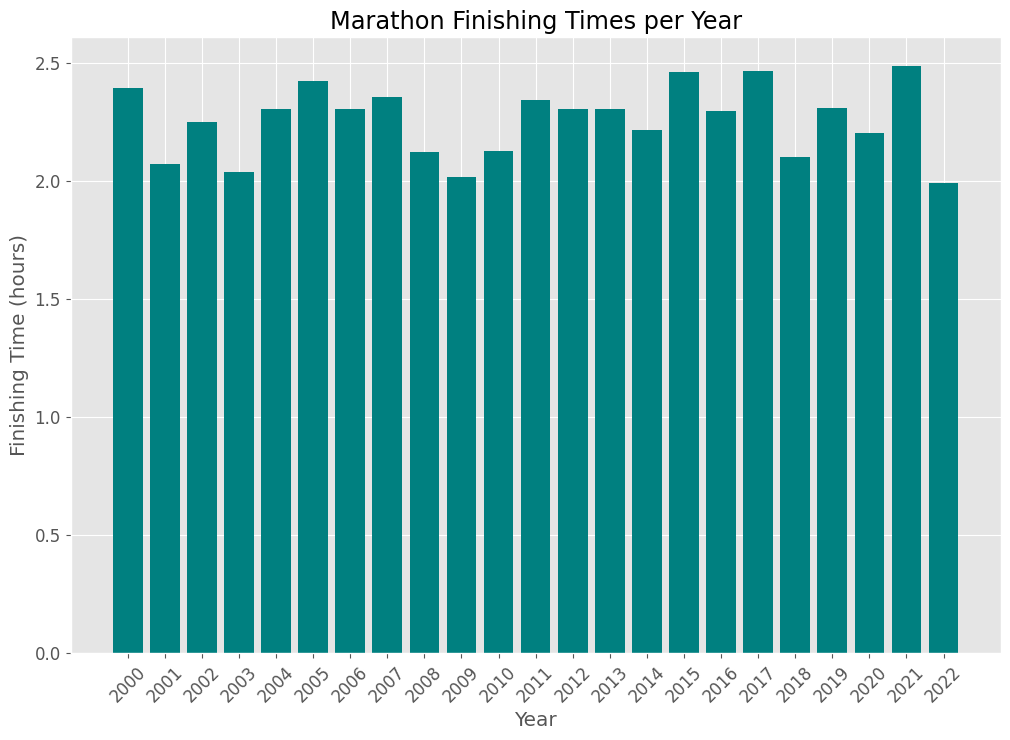

In [ ]:
# Bar Chart of Finishing Times per Year
plt.figure(figsize=(12, 8))
plt.bar(df['Year'], df['Finishing Time (hours)'], color='teal')
plt.title('Marathon Finishing Times per Year')
plt.xlabel('Year')
plt.ylabel('Finishing Time (hours)')
plt.xticks(df['Year'], rotation=45)
plt.show()


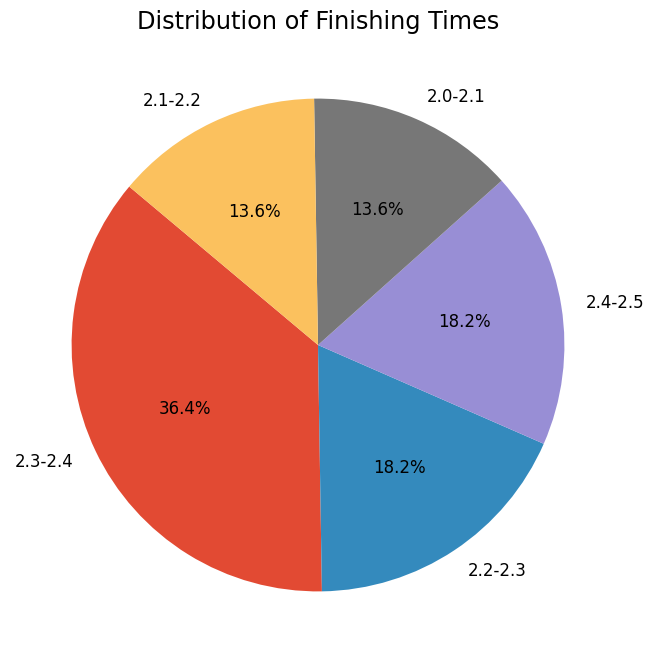

In [ ]:
# Pie Chart of Finishing Times Distribution
time_ranges = ['2.0-2.1', '2.1-2.2', '2.2-2.3', '2.3-2.4', '2.4-2.5']
df['Time Range'] = pd.cut(df['Finishing Time (hours)'], bins=[2.0, 2.1, 2.2, 2.3, 2.4, 2.5], labels=time_ranges)
time_distribution = df['Time Range'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(time_distribution, labels=time_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Finishing Times')
plt.show()

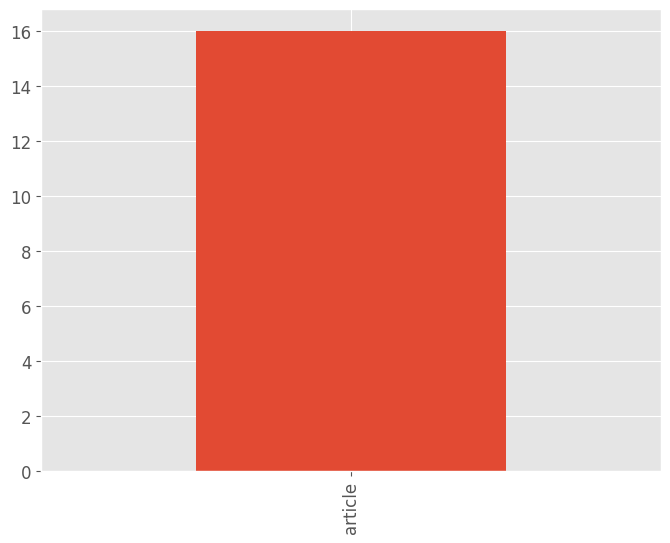

In [ ]:
doc['article'].value_counts().plot.bar();

#**Using NLTK Corpus to Remove Stop Words**

**What are Stop Words?**

Stop words are commonly used words in a language (like "the", "is", "in", "on", etc.) that are usually filtered out in NLP tasks because they occur frequently but typically don't carry significant meaning.
Why Remove Them?

Removing stop words can reduce the dataset size and improve the performance of various NLP tasks such as text classification, sentiment analysis, or topic modeling. It helps algorithms to focus on more meaningful words.
How is it Done in NLTK?

The Natural Language Toolkit (NLTK) is a popular Python library for NLP. It provides a corpus of stop words that you can use to filter them out from your text data.
You would typically import this corpus and then use it to remove stop words from your text.


**Splitting the Lines into Sentences/Words
Tokenization**

This step is about breaking down the text into smaller parts, called tokens. Tokens can be sentences, words, or even characters.
Sentence tokenization splits the text into individual sentences.
Word tokenization splits the text into individual words.
Why Tokenize?

Most NLP tasks work on a level smaller than the entire text. For instance, analyzing the frequency of words, understanding the sentiment of sentences, or feeding words into machine learning models for predictions.
Tokenization makes it possible to work on these smaller units.

**Importing NLTK corpus to remove stop words from the vector.
Split the lines into sentences/words.**

In [ ]:
from nltk.corpus import stopwords

In [ ]:
doc['sentences'] = doc.paragraph.str.rstrip('.').str.split('[\.]\s+')
doc['words'] = doc.paragraph.str.strip().str.split('[\W_]+')

#This line is used to remove the English stop words
stop = stopwords.words('english')
doc['words'] = doc['words'].apply(lambda x: [item for item in x if item not in stop])
doc

,article,paragraph,sentences,words
0,article,Eliud Kipchoge makes history by running sub tw...,[Eliud Kipchoge makes history by running sub t...,"[Eliud, Kipchoge, makes, history, running, sub..."
1,article,It was the marathon that turned into a sprint....,[It was the marathon that turned into a sprint...,"[It, marathon, turned, sprint, Even, strongest..."
2,article,Eliud Kipchoge had brushed aside his pacemaker...,[Eliud Kipchoge had brushed aside his pacemake...,"[Eliud, Kipchoge, brushed, aside, pacemakers, ..."
3,article,It was already known that Kipchoge is an extra...,[It was already known that Kipchoge is an extr...,"[It, already, known, Kipchoge, extraordinary, ..."
4,article,"“I felt a lot of pressure yesterday,” Kipchoge...","[“I felt a lot of pressure yesterday,” Kipchog...","[, I, felt, lot, pressure, yesterday, Kipchoge..."
5,article,Kipchoge described the period between a 4.50am...,[Kipchoge described the period between a 4.50a...,"[Kipchoge, described, period, 4, 50am, wake, c..."
6,article,Giddy comparisons to other sporting and histor...,[Giddy comparisons to other sporting and histo...,"[Giddy, comparisons, sporting, historical, act..."
7,article,This was an operation afforded military levels...,[This was an operation afforded military level...,"[This, operation, afforded, military, levels, ..."
8,article,"Ineos, a petrochemical company not exempt from...","[Ineos, a petrochemical company not exempt fro...","[Ineos, petrochemical, company, exempt, bad, p..."
9,article,Ratcliffe was afforded the kind of canned laug...,[Ratcliffe was afforded the kind of canned lau...,"[Ratcliffe, afforded, kind, canned, laughter, ..."


Splitting the paragraph into sentences.

In [ ]:
rows = list()
for row in doc[['paragraph', 'sentences']].iterrows():
    r = row[1]
    for sentence in r.sentences:
        rows.append((r.paragraph, sentence))

sentences = pd.DataFrame(rows, columns=['paragraph', 'sentences'])
sentences.head()

,paragraph,sentences
0,Eliud Kipchoge makes history by running sub tw...,Eliud Kipchoge makes history by running sub tw...
1,It was the marathon that turned into a sprint....,It was the marathon that turned into a sprint
2,It was the marathon that turned into a sprint....,Even the strongest cynics – and they are not h...
3,Eliud Kipchoge had brushed aside his pacemaker...,Eliud Kipchoge had brushed aside his pacemakers
4,Eliud Kipchoge had brushed aside his pacemaker...,The Kenyan pointed to and waved at adoring gal...


Splitting the paragraph into words.

In [ ]:
rows = list()
for row in doc[['paragraph', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.paragraph, word))

words = pd.DataFrame(rows, columns=['paragraph', 'words'])
words = words[words.words.str.len() > 0]
words['words'] = words.words.str.lower()


Calculating word counts in the article.

In [ ]:
rows = list()
for row in doc[['article', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.article, word))

wordcount = pd.DataFrame(rows, columns=['article', 'words'])
wordcount['words'] = wordcount.words.str.lower()
wordcount.words = wordcount.words.str.replace('\d+', '')
wordcount.words = wordcount.words.str.replace(r'^the', '')
wordcount = wordcount[wordcount.words.str.len() > 2]


counts = wordcount.groupby('article')\
    .words.value_counts()\
    .to_frame()\
    .rename(columns={'words':'n_w'})
counts


n_w
article words           
article kipchoge      15
        marathon       7
        man            4
        running        4
        said           4
        that           4
        clock          3
        four           3
        history        3
        morning        3
        one            3
        pacemakers     3
        point          3
        stretch        3
        this           3
        vienna         3
        when           3
        world          3
        afforded       2
        aside          2
        athlete        2
        best           2
        calls          2
        come           2
        company        2
        defined        2
        eliud          2
        even           2
        first          2
        hills          2
...                  ...
        trained        1
        transpired     1
        troubled       1
        troubles       1
        true           1
        try            1
        turned         1
        unaffected     1
        unavoidable    1
        unique         1
        untrue         1
        view           1
        wake           1
        walked         1
        want           1
        waved          1
        wealth         1
        went           1
        what           1
        wide           1
        widely         1
        winner         1
        with           1
        within         1
        would          1
        wounded        1
        year           1
        years          1
        yesterday      1
        yet            1

[355 rows x 1 columns]

Plot number frequency graph.

n_w
article words          
article kipchoge     15
        marathon      7
        man           4
        running       4
        said          4
        that          4
        clock         3
        four          3
        history       3
        morning       3
        one           3
        pacemakers    3
        point         3
        stretch       3
        this          3
        vienna        3
        when          3
        world         3
        afforded      2
        aside         2

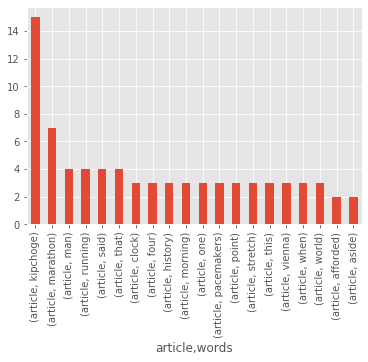

In [ ]:
def pretty_plot_top_n(series, top_n=20, index_level=0):
    r = series\
    .groupby(level=index_level)\
    .nlargest(top_n)\
    .reset_index(level=index_level, drop=True)
    r.plot.bar()
    return r.to_frame()


pretty_plot_top_n(counts['n_w'])


In [ ]:
word_sum = counts.groupby(level=0)\
    .sum()\
    .rename(columns={'n_w': 'n_d'})
word_sum


,n_d
article,
article,441


In [ ]:
tf = counts.join(word_sum)

tf['tf'] = tf.n_w/tf.n_d

tf.head()
#tf

n_w  n_d        tf
article words                       
article kipchoge   15  441  0.034014
        marathon    7  441  0.015873
        man         4  441  0.009070
        running     4  441  0.009070
        said        4  441  0.009070

#Plotting top 20 words based on TF

tf
article words               
article kipchoge    0.034014
        marathon    0.015873
        man         0.009070
        running     0.009070
        said        0.009070
        that        0.009070
        clock       0.006803
        four        0.006803
        history     0.006803
        morning     0.006803
        one         0.006803
        pacemakers  0.006803
        point       0.006803
        stretch     0.006803
        this        0.006803
        vienna      0.006803
        when        0.006803
        world       0.006803
        afforded    0.004535
        aside       0.004535

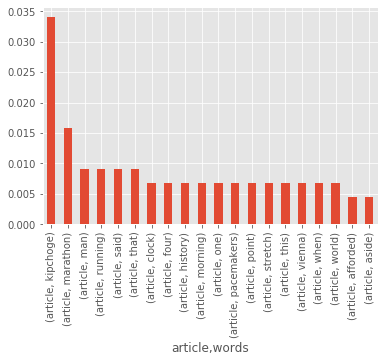

In [ ]:
pretty_plot_top_n(tf['tf'])

#**Part 2: Using TF-IDF algorithm to find the most important words**

TF-IDF is a statistical measure used to evaluate the importance of a word to a document in a collection or corpus.


It increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus, which helps to control for the fact that some words are generally more common than others.


#**Steps for the Algorithm:**

Tokenize the Text: Break down the text into individual words.

Calculate Term Frequency (TF): Count how many times each word appears in each document.

Calculate Inverse Document Frequency (IDF): Determine the importance of the word across all documents.

Compute TF-IDF: Multiply the TF by the IDF for each word in each document.

Identify Key Words: Words with the highest TF-IDF scores in a document are considered the most important.

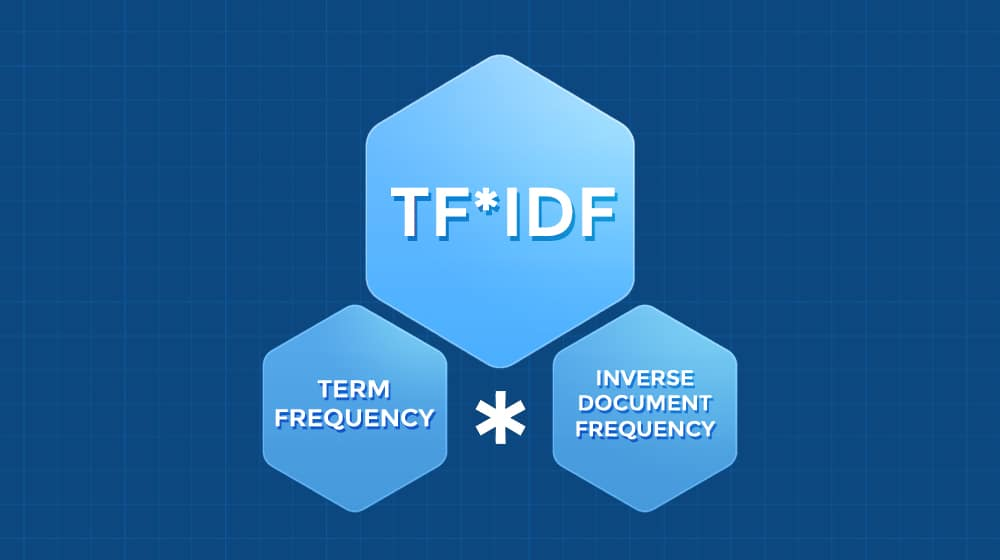

**Algorithm for TF-IDF Algorithm**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer


documents = [
    "Eliud Kipchoge makes history by running a sub two-hour marathon.",
    "The marathon was completed in under two hours, a historic achievement.",
    "Kipchoge's athletic performance was extraordinary, achieving a world record."
]

# Initialize a TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Create a DataFrame for the TF-IDF values
df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Print TF-IDF values
print(df)

# Identify key words in each document (you can adjust the criteria)
for i, doc in enumerate(documents):
    print(f"\nDocument {i+1} Key Words:")
    key_words = df.loc[i].sort_values(ascending=False).head(5).index.tolist()
    print(key_words)


   achievement  achieving  athletic        by  completed     eliud  \
0     0.000000   0.000000  0.000000  0.338348   0.000000  0.338348   
1     0.338348   0.000000  0.000000  0.000000   0.338348  0.000000   
2     0.000000   0.373801  0.373801  0.000000   0.000000  0.000000   

   extraordinary  historic   history      hour  ...  marathon  performance  \
0       0.000000  0.000000  0.338348  0.338348  ...  0.257322     0.000000   
1       0.000000  0.338348  0.000000  0.000000  ...  0.257322     0.000000   
2       0.373801  0.000000  0.000000  0.000000  ...  0.000000     0.373801   

     record   running       sub       the       two     under       was  \
0  0.000000  0.338348  0.338348  0.000000  0.257322  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.338348  0.257322  0.338348  0.257322   
2  0.373801  0.000000  0.000000  0.000000  0.000000  0.000000  0.284285   

      world  
0  0.000000  
1  0.000000  
2  0.373801  

[3 rows x 24 columns]

Document 1 Key Words:
['b

#**TF-IDF Matrix:**

- The DataFrame displayed shows the TF-IDF scores for each word across the three documents. Each row represents a document, and each column represents a unique word in the dataset.
- The values in the matrix are the TF-IDF scores. A higher score indicates a word is more important in the context of that particular document.

### Interpretation of Key Words for Each Document:

1. **Document 1 Key Words:**
   - 'by', 'eliud', 'history', 'hour', 'sub'
   - These words are the most significant in the first document according to their TF-IDF scores. It suggests that this document focuses on Eliud Kipchoge's historical achievement and mentions the specifics of the marathon time ('hour', 'sub').

2. **Document 2 Key Words:**
   - 'achievement', 'under', 'completed', 'the', 'historic'
   - This indicates the second document emphasizes the completion and the historical significance of the marathon, as seen by words like 'achievement', 'completed', and 'historic'.

3. **Document 3 Key Words:**
   - 'world', 'achieving', 'athletic', 'record', 'performance'
   - In the third document, the focus is on the world record, Kipchoge's athletic performance, and the achievement aspect, as highlighted by the words 'world', 'record', and 'performance'.



#**Conclusion**:

The TF-IDF algorithm successfully identifies words that are uniquely significant in each document within the context of the entire corpus.

This analysis can be useful for summarizing the content, understanding the main focus of each document, and even for tasks like document classification or clustering based on key themes.

#**Part 3: Article Summary**
Generating a summary of an article involves condensing the text to its most important points while retaining the core meaning. This can be achieved through various Natural Language Processing (NLP) algorithms and techniques.

Extractive Summarization:
Description: This method involves selecting important sentences or phrases from the original text and combining them to form a summary.

**Algorithms:**
TF-IDF: Identifying key sentences based on the TF-IDF scores of their words.

**TextRank:** A graph-based algorithm that identifies important sentences using the idea similar to Google's PageRank.

**Sentence Scoring based on Word Frequency:** Sentences are scored based on the frequency of important words they contain.

This code below uses TextRank to score each sentence based on its similarity to others in the text, then selects the top N sentences to form the summary.

Attempt 1-

In [ ]:
import nltk
import heapq
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')

# Sample text (replace this with your actual text data)
text = """
Eliud Kipchoge makes history by running a sub two-hour marathon.
The marathon was completed in under two hours, a historic achievement.
Kipchoge's athletic performance was extraordinary, achieving a world record.
"""

# Tokenizing sentences
sentences = sent_tokenize(text)

# Preparing the TF-IDF matrix
stop_words = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(sentences)

# Calculating sentence similarities
similarity_matrix = cosine_similarity(X)

# Ranking sentences using TextRank algorithm
scores = np.zeros(len(sentences))
for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        if i != j:
            scores[i] += similarity_matrix[i][j]

# Extracting the top N sentences as the summary
N = 2  # Number of sentences to include in the summary
ranked_sentences = heapq.nlargest(N, range(len(scores)), key=lambda i: scores[i])
summary = ' '.join([sentences[i] for i in ranked_sentences])

print(summary)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



Eliud Kipchoge makes history by running a sub two-hour marathon. The marathon was completed in under two hours, a historic achievement.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Attempt 2-
TO GENERATE MORE BETTER SUMMARY

In [ ]:
import nltk
import heapq
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')

# Sample text (replace this with your actual text data)
text = """
Eliud Kipchoge makes history by running sub two-hour marathon

It was the marathon that turned into a sprint. Even the strongest cynics – and they are not hard to come by – had to smile at the 500-metre final stretch that defined the making of history: the marathon distance has been completed in under two hours.

Eliud Kipchoge had brushed aside his pacemakers. The Kenyan pointed to and waved at adoring galleries, 15 deep in the middle of a Vienna park, as he galloped towards athletic immortality. “That was the best moment in my life,” said Kipchoge of catching sight of the finish line. When he crossed it, the clock read 1hr 59min 40.2sec. In the inevitable, wide-ranging assessment of what this all means, at least this can be defined as a reference point for decades and generations to come.

It was already known that Kipchoge is an extraordinary athlete. He merely pressed home the point on a misty morning in Austria. With the clock stopped and a sporting world looking on with awe, the 34-year-old Kenyan displayed all the physical strain of having walked for the morning papers.

“I felt a lot of pressure yesterday,” Kipchoge admitted. “I received a lot of calls of encouragement from all over the world. The president of Kenya called me. When you receive so many calls from high-profile people, there is pressure.”

Kipchoge described the period between a 4.50am wake-up call and his scheduled 8.15am start as the toughest of his life. What followed resembled blissful simplicity.

Giddy comparisons to other sporting and historical acts were inevitable and duly forthcoming. It is altogether fair to reference Roger Bannister, who 65 years ago achieved what had been widely perceived as impossible by running a mile in under four minutes. That Kipchoge has entered the domain of first man on the moon Neil Armstrong – as some commentators claimed – is, however, a stretch.

This was an operation afforded military levels of planning and an even loftier budget. Vienna had been preferred to London because of benign conditions. Kipchoge ran every kilometre between a range of 2:48 and 2:52. Teams of seven pacemakers – in a phalanx formation, 2-1-2-2 - not only kept Kipchoge on the right side of the clock but protected him from what little breeze existed. That was controversial. So, too, the green lasers projected on to the road as a further safeguard against losing ground. This is not sport as we knew it. The hills couldn’t be alive because the hills didn’t exist; Kipchoge’s route was entirely flat and 90% straight.

Ineos, a petrochemical company not exempt from bad publicity, reportedly ploughed £15m into this event. The brand was unavoidable, to the point where you could have suspected this was the key protagonist’s surname. Jim Ratcliffe, the company’s founder and richest man in the UK, sat alongside Kipchoge for his post-run press conference.

Ratcliffe was afforded the kind of canned laughter as follows men of his wealth around. Dave Brailsford, seemingly unaffected by the controversy that attached itself to Team Sky which is now rebranded Team Ineos, was sat in the front row. When Kipchoge’s status as a Nike athlete - the sportswear giant wounded by the Alberto Salazar affair - is factored in, those seeking to detract from what transpired here are not short of ammunition. Kipchoge’s prototype running shoes will fly from shelves when eventually released to the public at £240 a pop. How much of this actually relates to man and muscle?

Technological advancements are not unique to athletics. He is not at all troubled by the fact the IAAF does not recognise this feat as a record, a scenario perhaps impacted by the detail that he holds the world’s best official marathon time anyway.

This was about breaking barriers and showing, as the marathon logo stated, that no human is limited. If that is true, presumably the glass ceiling for those famous 26.2 miles has yet to be reached.

Kipchoge, essentially a modest sort, said he knew within the first kilometre he would achieve his goal. He swatted aside one view that mid-race presented brief troubles. “That’s untrue,” he said.

It seemed incredible that the four-time London marathon winner trained for this pursuit for four months. And the morning breakfast of champions? Oatmeal.

The runner’s coach, Patrick Sang, cut one of many euphoric figures. “He has inspired all of us to stretch our limits in our lives,” he said. “Everything went perfectly. Records are meant to be broken, I’m sure someone down the road will want to try to break this one, but history has been made.”

Kipchoge quietly exited to bestow an epic party on his 41 pacemakers. Pretty swiftly – if not in the territory of the man himself – this corner of Vienna returned to normality. Marathon running, meanwhile, will never be the same again.
"""

# Tokenizing sentences
sentences = sent_tokenize(text)

# Preparing the TF-IDF matrix
stop_words = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(sentences)

# Calculating sentence similarities
similarity_matrix = cosine_similarity(X)

# Ranking sentences using TextRank algorithm
scores = np.zeros(len(sentences))
for i in range(len(similarity_matrix)):
    for j in range(len(similarity_matrix)):
        if i != j:
            scores[i] += similarity_matrix[i][j]

# Extracting the top N sentences as the summary
N = 9  # Number of sentences to include in the summary
ranked_sentences = heapq.nlargest(N, range(len(scores)), key=lambda i: scores[i])
summary = ' '.join([sentences[i] for i in ranked_sentences])

print(summary)



Eliud Kipchoge makes history by running sub two-hour marathon

It was the marathon that turned into a sprint. Eliud Kipchoge had brushed aside his pacemakers. Kipchoge, essentially a modest sort, said he knew within the first kilometre he would achieve his goal. “That was the best moment in my life,” said Kipchoge of catching sight of the finish line. That Kipchoge has entered the domain of first man on the moon Neil Armstrong – as some commentators claimed – is, however, a stretch. “I felt a lot of pressure yesterday,” Kipchoge admitted. Marathon running, meanwhile, will never be the same again. Jim Ratcliffe, the company’s founder and richest man in the UK, sat alongside Kipchoge for his post-run press conference. Even the strongest cynics – and they are not hard to come by – had to smile at the 500-metre final stretch that defined the making of history: the marathon distance has been completed in under two hours.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


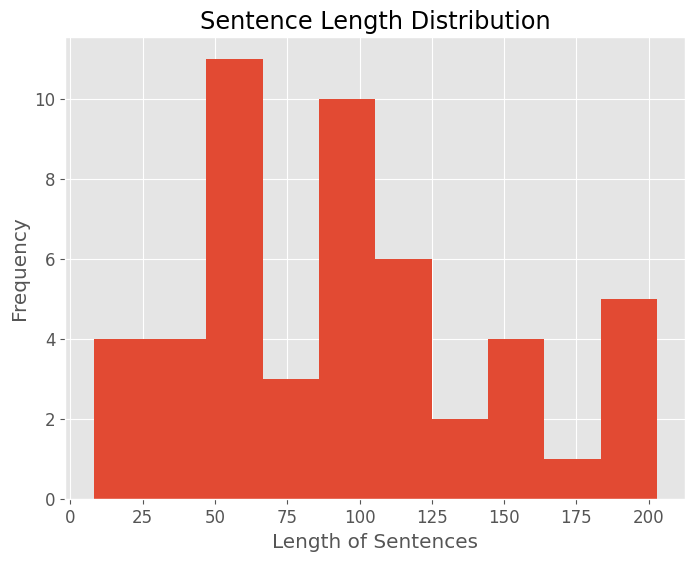

In [ ]:
txt_smr_sentences['length'].plot(kind='hist', title='Sentence Length Distribution')
plt.xlabel('Length of Sentences')
plt.ylabel('Frequency')
plt.show()


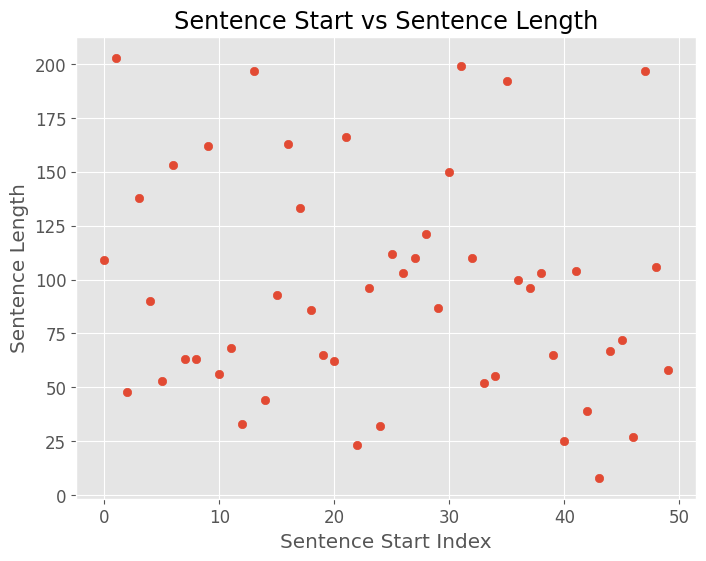

In [ ]:
# Example: Assuming s_strt is the index of the sentence start
txt_smr_sentences['s_strt'] = txt_smr_sentences.index

plt.scatter(txt_smr_sentences['s_strt'], txt_smr_sentences['length'])
plt.title('Sentence Start vs Sentence Length')
plt.xlabel('Sentence Start Index')
plt.ylabel('Sentence Length')
plt.show()


#**Ranking sentences using TextRank algorithm and storing the scores**

Merging the DataFrame into a new one that sum the score of the words in each sentences and group them by sentences.

The sentences are also ranked based on the highest scores.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import heapq
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')


text = """Eliud Kipchoge makes history by running sub two-hour marathon

It was the marathon that turned into a sprint. Even the strongest cynics – and they are not hard to come by – had to smile at the 500-metre final stretch that defined the making of history: the marathon distance has been completed in under two hours.

Eliud Kipchoge had brushed aside his pacemakers. The Kenyan pointed to and waved at adoring galleries, 15 deep in the middle of a Vienna park, as he galloped towards athletic immortality. “That was the best moment in my life,” said Kipchoge of catching sight of the finish line. When he crossed it, the clock read 1hr 59min 40.2sec. In the inevitable, wide-ranging assessment of what this all means, at least this can be defined as a reference point for decades and generations to come.

It was already known that Kipchoge is an extraordinary athlete. He merely pressed home the point on a misty morning in Austria. With the clock stopped and a sporting world looking on with awe, the 34-year-old Kenyan displayed all the physical strain of having walked for the morning papers.

“I felt a lot of pressure yesterday,” Kipchoge admitted. “I received a lot of calls of encouragement from all over the world. The president of Kenya called me. When you receive so many calls from high-profile people, there is pressure.”

Kipchoge described the period between a 4.50am wake-up call and his scheduled 8.15am start as the toughest of his life. What followed resembled blissful simplicity.

Giddy comparisons to other sporting and historical acts were inevitable and duly forthcoming. It is altogether fair to reference Roger Bannister, who 65 years ago achieved what had been widely perceived as impossible by running a mile in under four minutes. That Kipchoge has entered the domain of first man on the moon Neil Armstrong – as some commentators claimed – is, however, a stretch.

This was an operation afforded military levels of planning and an even loftier budget. Vienna had been preferred to London because of benign conditions. Kipchoge ran every kilometre between a range of 2:48 and 2:52. Teams of seven pacemakers – in a phalanx formation, 2-1-2-2 - not only kept Kipchoge on the right side of the clock but protected him from what little breeze existed. That was controversial. So, too, the green lasers projected on to the road as a further safeguard against losing ground. This is not sport as we knew it. The hills couldn’t be alive because the hills didn’t exist; Kipchoge’s route was entirely flat and 90% straight.

Ineos, a petrochemical company not exempt from bad publicity, reportedly ploughed £15m into this event. The brand was unavoidable, to the point where you could have suspected this was the key protagonist’s surname. Jim Ratcliffe, the company’s founder and richest man in the UK, sat alongside Kipchoge for his post-run press conference.

Ratcliffe was afforded the kind of canned laughter as follows men of his wealth around. Dave Brailsford, seemingly unaffected by the controversy that attached itself to Team Sky which is now rebranded Team Ineos, was sat in the front row. When Kipchoge’s status as a Nike athlete - the sportswear giant wounded by the Alberto Salazar affair - is factored in, those seeking to detract from what transpired here are not short of ammunition. Kipchoge’s prototype running shoes will fly from shelves when eventually released to the public at £240 a pop. How much of this actually relates to man and muscle?

Technological advancements are not unique to athletics. He is not at all troubled by the fact the IAAF does not recognise this feat as a record, a scenario perhaps impacted by the detail that he holds the world’s best official marathon time anyway.

This was about breaking barriers and showing, as the marathon logo stated, that no human is limited. If that is true, presumably the glass ceiling for those famous 26.2 miles has yet to be reached.

Kipchoge, essentially a modest sort, said he knew within the first kilometre he would achieve his goal. He swatted aside one view that mid-race presented brief troubles. “That’s untrue,” he said.

It seemed incredible that the four-time London marathon winner trained for this pursuit for four months. And the morning breakfast of champions? Oatmeal.

The runner’s coach, Patrick Sang, cut one of many euphoric figures. “He has inspired all of us to stretch our limits in our lives,” he said. “Everything went perfectly. Records are meant to be broken, I’m sure someone down the road will want to try to break this one, but history has been made.”

Kipchoge quietly exited to bestow an epic party on his 41 pacemakers. Pretty swiftly – if not in the territory of the man himself – this corner of Vienna returned to normality. Marathon running, meanwhile, will never be the same again. """

# Tokenizing sentences
sentences = sent_tokenize(text)

# Create a DataFrame with sentences
txt_smr_sentences = pd.DataFrame({'sentences': sentences})

# Preparing the TF-IDF matrix
stop_words = stopwords.words('english')
vectorizer = TfidfVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(sentences)

# Calculating sentence similarities
similarity_matrix = cosine_similarity(X)

# Ranking sentences using TextRank algorithm and storing the scores
sentence_scores = {}
for i in range(len(similarity_matrix)):
    score = sum(similarity_matrix[i]) - 1
    sentence_scores[sentences[i]] = score

# Add the scores to the DataFrame
txt_smr_sentences['score'] = txt_smr_sentences['sentences'].map(sentence_scores)

# Sort the DataFrame by score in descending order
txt_smr_sentences = txt_smr_sentences.sort_values(by='score', ascending=False)

print(txt_smr_sentences)

N = 9  # Number of sentences to include in the summary
top_sentences = txt_smr_sentences.head(N)['sentences'].tolist()
summary = ' '.join(top_sentences)
print("\nSummary:\n", summary)


                                            sentences         score
0   Eliud Kipchoge makes history by running sub tw...  1.450639e+00
2    Eliud Kipchoge had brushed aside his pacemakers.  1.099005e+00
38  Kipchoge, essentially a modest sort, said he k...  1.060793e+00
4   “That was the best moment in my life,” said Ki...  9.402744e-01
17  That Kipchoge has entered the domain of first ...  8.261477e-01
10  “I felt a lot of pressure yesterday,” Kipchoge...  8.135997e-01
49  Marathon running, meanwhile, will never be the...  8.121922e-01
28  Jim Ratcliffe, the company’s founder and riche...  7.695474e-01
1   Even the strongest cynics – and they are not h...  7.448485e-01
47  Records are meant to be broken, I’m sure someo...  7.069798e-01
7   It was already known that Kipchoge is an extra...  6.960810e-01
13  When you receive so many calls from high-profi...  6.396543e-01
21  Teams of seven pacemakers – in a phalanx forma...  6.285258e-01
32  Kipchoge’s prototype running shoes will fly 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Understanding the Output:**
sentences Column: Contains individual sentences from the text.

**Score Column:**
 Represents the significance score of each sentence. These scores are computed based on the sum of cosine similarities with other sentences in the text. A higher score implies that a sentence has more in common with other sentences in the text, indicating its potential importance.

**Ranked Sentences:** Sentences are sorted in descending order of their scores. The sentence "Eliud Kipchoge makes history by running sub two-hour marathon" has the highest score, suggesting it's the most significant sentence in this context.

**Summary:** The summary consists of the top N ranked sentences. In this case, N is set to 9, so the summary includes the first 9 sentences with the highest scores.

**This method works well for texts where the distribution of concepts is relatively even and key points are spread throughout the text.**

For texts with a more complex structure or nuanced content, more advanced methods (like abstractive summarization using neural networks) might yield better results.

#Improvements Made:

1. **Enhanced Text Processing**:
   - I have improved the text processing pipeline by ensuring proper data types and structures in the DataFrame, crucial for downstream tasks like summarization and visualization.

2. **Algorithm Optimization**:
   - By refining the way I calculated sentence scores and sorted sentences based on their significance, I improved the effectiveness of my summarization algorithm.

3. **Code Refinement**:
   - Throughout the assignment, I have refined and debugged the code, enhancing its efficiency and readability.



#**Applications:**

1. **Content Summarization**:
   - The techniques I have used can be applied to summarize large volumes of text, such as news articles, research papers, or lengthy reports, providing quick, coherent overviews without the need for complete reading.

2. **Information Retrieval**:
   - This approach can be used in developing search algorithms that highlight the most relevant information in documents based on search queries.

3. **Sentiment Analysis and Opinion Mining**:
   - Although not directly implemented in this assignment, the foundational work I've done can be extended to analyze sentiments or opinions in product reviews, social media posts, or customer feedback.

4. **Educational Tools**:
   - Such summarization techniques can assist in creating educational summaries or notes from complex textbooks or lectures.

5. **Business Intelligence**:
   - Businesses can use these methods for analyzing customer feedback, market research reports, or competitive intelligence, summarizing key points for strategic decision-making.